## 1. Initial Vertex of the Given Vehicle ( v(c0)):

According to paper we have just **initial states** of the vehicles so we just use the **initial states** of the vehicles in the xml file. We will set vehicle's initial states via a method called **setInitialVertextoVehicles** with respect to paper.

In [1]:
def v( obs):
    return obs.initial_state.position

### Sample usage:
#### Read XML file

We Assume that we will have a **xml file** which we can read **first initial** state of the vehicles and 
**lanelet network** of way. We directly took this **reading** from tutorial session.

In [2]:
import os
import matplotlib.pyplot as plt
from IPython import display

# import functions to read xml file and visualize commonroad objects
from commonroad.common.file_reader import CommonRoadFileReader
from commonroad.visualization.draw_dispatch_cr import draw_object

# generate path of the file to be opened
#file_path = "ZAM_Tutorial-1_1_T-1.xml"
#file_path = "ZAM_Tjunction-1_66_T-1.xml"
file_path = "CHN_Cho-2_1_T-1.xml"

# read in the scenario and planning problem set
crf = CommonRoadFileReader(file_path)
scenario, planning_problem_set = crf.open()

# plot the scenario for 40 time step, here each time step corresponds to 0.1 second
for i in range(0, 40):
    # uncomment to clear previous graph
    display.clear_output(wait=True)
    
    plt.figure(figsize=(20, 10))
    # plot the scenario at different time step
    draw_object(scenario, draw_params={'time_begin': i})
    # plot the planning problem set
    draw_object(planning_problem_set)
    plt.gca().set_aspect('equal')
    plt.show()


<Figure size 2000x1000 with 1 Axes>

In [7]:
file_path = obstacles = scenario.obstacles
for o in obstacles:
    x= v(o)
    print(x)

{67, 68}
{61}
{60}
{62}
{63}
{64}
{59}
{58}
{57}
{59}
{57}
{58}
{57}
{57}
{65}
{53}
{53}
{53}
{53}


## 2. Directed Edges Between Vertices ( ε )


### A) Create Graph includes Lanelets


In [4]:
def CreateLaneletGraph(lanelets):
    import networkx as nx
    import matplotlib.pyplot as plt
    #L:       is a directed graph for each of the lanelet
    #G:       is exist of graphs of lanelets and G mapped with lanelets' id
    #points:  for represent the each point in a lanelet
    #edges:   edges for each lanelet
    #
    G = nx.DiGraph()
    for lanelet in lanelets:
        i = lanelet.lanelet_id
        L = nx.DiGraph()
        #L add nodes and edges
        points = list(range(1,len(lanelet.distance)))
        edges = CreateEdgeList(points)
        L.add_nodes_from(points, distance = lanelet.distance, vertices=lanelet.center_vertices)
        L.add_edges_from(edges)
        #G add nodes and edges
        edgesLanelet, adjacent_lanelets = CreateEdgesBtwnLanelets(lanelet)
        G.add_node(i, adj_lanelet = adjacent_lanelets , graph = L)  # adding the graph of lanelet with id i and adjecent lanelet adj_lanelet
        G.add_edges_from(edgesLanelet)
    return G

### B) Edges Between a Lanelet and It's predessor and successor

In [5]:
#return an array that include edges list between given lanelet  and its predessor and successor
def CreateEdgesBtwnLanelets(l):
    # we can manage previously added edges in here but it can be time waste. 
    #I am Not sure which is more efficient
    # Melike
    #TODO: add adjacency lanelets
    e = []
    a = []
    if l.predecessor:
        for p in l.predecessor:
            e.append([p, l.lanelet_id ])        
    if l.successor:
        for s in l.successor:
            e.append([l.lanelet_id, s])     
    if l.adj_left_same_direction:
        a.append(l.adj_left)
        #e.append(l.lanelet_id, l.adj_left.lanelet_id) #TODO decide do we need to connect adj lanelets
        #e.append(l.adj_left.lanelet_id, l.lanelet_id)
    if l.adj_right_same_direction:
        a.append(l.adj_right)
        #e.append(l.lanelet_id, l.adj_right.lanelet_id)
        #e.append(l.adj_right.lanelet_id, l.lanelet_id)
    return e, a

### C) Edges Between nodes in a Lanelet

In [6]:
#there have to be a quick way instead of using a for loop
#creating edges between nodes in a lanelet
def CreateEdgeList(p):
    c = []
    prev = None
    for i in p:
        if prev != None:
            c.append([int(prev),int(i)])
        prev = i
    return c

#### Sample Usage:

/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/melike/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


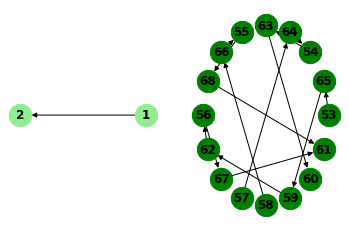

In [7]:
#distance
# lanelet_id
#adj_left=None, adj_left_same_direction=None, adj_right=None, ad_right_same_direction=None, 
#predecessor, succesor
#line_marking_right_vertices

########## Sample Usage ###########
options1 = {
    'node_color': 'lightgreen',
    'node_size': 500,
    'width': 1,
}
options2 = {
    'node_color': 'green',
    'node_size': 500,
    'width': 1,
}

import networkx as nx
lanelets = scenario.lanelet_network.lanelets
G = CreateLaneletGraph(lanelets)
plt.subplot(121)
nx.draw_circular(G.nodes[lanelets[0].lanelet_id]['graph'], with_labels=True, font_weight='bold', **options1) #for reaching the graph of lanelet with id i
plt.subplot(122)
nx.draw_circular(G,with_labels=True, font_weight='bold', **options2)
plt.show()

[53, 65, 54, 64, 63, 55, 66, 68, 56, 62, 67, 57, 58, 59, 60, 61]


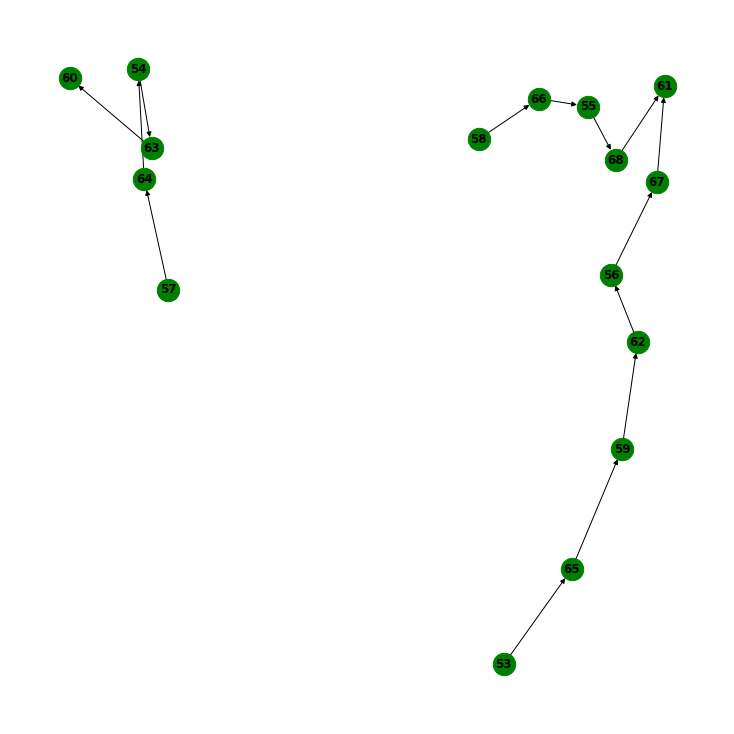

Lanelet with id:53
None :  None
None :  None
Lanelet with id:54
None :  None
True :  55
Lanelet with id:55
True :  54
None :  None
Lanelet with id:56
None :  None
None :  None
Lanelet with id:57
None :  None
True :  58
Lanelet with id:58
True :  57
None :  None
Lanelet with id:59
None :  None
None :  None
Lanelet with id:60
None :  None
True :  61
Lanelet with id:61
True :  60
None :  None
Lanelet with id:62
None :  None
None :  None
Lanelet with id:63
None :  None
True :  68
Lanelet with id:64
None :  None
True :  66
Lanelet with id:65
None :  None
None :  None
Lanelet with id:66
True :  64
None :  None
Lanelet with id:67
None :  None
None :  None
Lanelet with id:68
True :  63
None :  None


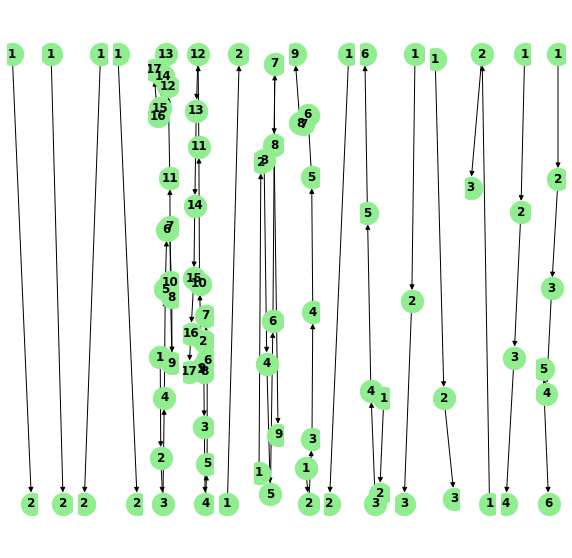

In [8]:
print(G.nodes)
plt.rcParams['figure.figsize'] = (10.0, 10.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
nx.draw(G,with_labels=True, font_weight='bold', **options2)
plt.show()
i = 1
for lanelet in lanelets:
    print(lanelet)
    plt.subplot(1, len(lanelets), i)
    nx.draw(G.nodes[lanelet.lanelet_id]['graph'], with_labels=True, font_weight='bold', **options1) #for reaching the graph of lanelet with id i
    print(lanelet.adj_left_same_direction, ": ", lanelet.adj_left)
    print(lanelet.adj_right_same_direction, ": ", lanelet.adj_right)
    """if 53 in G.nodes[lanelet.lanelet_id]['adj_lanelet']: #adjacent lanelet control # contain()
        print(True)"""
    i = i+1
plt.show()